# SAO/LIP Python Primer Course Lecture 7

In this notebook, you will learn about:
- File paths and the `os` library
- I/O in base Python
- The `pandas` library
- Reading and viewing files in `pandas`
- Manipulating datasets

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/acorreia61201/SAOPythonPrimer/blob/main/lectures/Lecture7.ipynb)

At the end of our discussion on `numpy`, we started covering the concept of *I/O*, or *input/output*. This is a useful feature that you can use to share or load large datasets. In this lecture, we'll cover two more methods to do this: using base Python, and using an external library `pandas`.

## File Paths

Before we get into that, it's important that we understand how files are stored on your computer. We can use a library `os` to visualize how this works.

In [ ]:
import os

All files on an operating system are located in a *directory*, more commonly known as a folder. Directories can contain files or subdirectories, which themselves may have their own files and subdirectories. Each file has a sequence of directories describing where it is on your system known as a *path*.

This notebook, for example, has a path. If you're currently viewing this notebook, its path will be the *current working directory*. In Python, we can view the current working directory with `os.getcwd()`:

In [ ]:
lecs = os.getcwd()
lecs

This current working directory is populated with some files auto-generated by Colab (if you're using that; you may have some other files if you're running locally). To view them all, we use the *list* command which we call in Python with `os.listdir()`.

In [ ]:
os.listdir()

Each file within the same directory has a unique name with two parts. Each file has a *file name*, which itself contains the *file extension*. File extensions can tell your operating system how to interpret and open files. For example, extensions like `png` and `jpg` are interpreted as images, while extensions like `txt` are interpreted as plain-text files. Each lecture above has the extension `ipynb`, the standard for a Jupyter notebook. 

We can create a new directory in the current working directory using `os.mkdir()`:

In [ ]:
os.mkdir('example_dir')

We can see the new directory using `os.listdir()`:

In [ ]:
os.listdir()

Notice that if we try to add a new directory with the same name we get an error:

In [ ]:
os.mkdir('example_dir')

We can move our current working directory to this new directory using `os.chdir()`:

In [ ]:
os.chdir('example_dir')
os.getcwd()

Let's see what's in this new directory:

In [ ]:
os.listdir()

It returns an empty list. This makes sense; we haven't added anything to it yet. We can, however, view what's in the previous directory (or any directory on the system, for that matter) using an *absolute path*:

In [ ]:
os.listdir(lecs)

There are two special strings that represent `relative paths` to the current directory. The string `.` refers to the current working directory:

In [ ]:
os.listdir('.')

The string `..` refers to the directory above the current working directory:

In [ ]:
os.listdir('..')

We can use this to easily move up one directory in the path:

In [ ]:
os.chdir('..')
os.getcwd()

We can also modify currently existing files. If we want to change the name of the directory we just made, we can use `os.rename()`:

In [ ]:
os.rename('example_dir', 'new_dir')

In [ ]:
os.listdir()

If we want to remove it entirely, we can use `os.remove()`:

In [ ]:
os.rmdir('new_dir')

If we want to remove files, we can instead use `os.remove()`. If you try to remove a directory with this command, you'll get an error:

In [ ]:
os.mkdir('example')

In [ ]:
os.remove('example')

The same is true in reverse (i.e. using `os.rmdir()` on a file). These are the basics of using `os` to view and manipulate files; the full documentation is at https://docs.python.org/3/library/os.html. (There's a lot here; you may be better off doing your own research if you have a specific thing you want to do.)

## I/O in Base Python

Now, let's get to reading and writing files using built-in Python commands. First, we need a file to open. There are two ways to do this. We can download an external file from the internet using the command `wget`. This is a command-line function, so we have to precede it with `!`. For this example, we'll download the Gettysburg Address:

In [ ]:
!wget https://collincapano.com/wp-content/uploads/2023/01/gettysburg_address-bliss_copy.txt

Let's see if it downloaded properly:

In [ ]:
os.listdir()

Let's give it a more concise name using `os`:

In [ ]:
os.rename('gettysburg_address-bliss_copy.txt', 'gettysburg_address.txt')

Alternatively, we can create our own file using the function `open()`. This is one of the primary functions used for I/O. As the name implies, its simplest use is to open a file. However, there are a variety of *modes* we can use, accessible via extra arguments. To create a new file, we pass `'x'` as a second argument, indicating create mode:

In [ ]:
open('new_file.txt', 'x')

Again, we can check that this new file exists using `os`:

In [ ]:
os.listdir()

### Reading Files

Now, let's open the files we've created. We can do this by using `open()` without any extra arguments:

In [ ]:
newfile = open('new_file.txt')
gb = open('gettysburg_address.txt')

By default, `open()` will open a file in read mode. This means that all we can do is look at its contents. To print the contents of a file, we use the method `read()` on one of the objects we've created above. Let's try it with the Gettysburg Address:

In [ ]:
print(gb.read())

Another way we can read the contents of a file is with the method `readlines()`, which we'll try out below:

In [ ]:
gb.readlines()

Nothing printed...what's going on? It turns out that `readlines()` only prints out the lines we haven't viewed yet. Since `read()` with no arguments prints the entire document, additional calls of `read()` will print nothing.

To do this, we'll have to create a new `open()` instance. It's good practice to close any documents you've opened once you're done using them so you don't risk losing data. We can do this with the `close()` method:

In [ ]:
newfile.close()
gb.close()

Now, let's open the Gettysburg Address again, this time using `readlines()`:

In [ ]:
gb = open('gettysburg_address.txt')
print(gb.readlines())
gb.close()

`readlines()` adds all of the lines in the file to a list as individual elements. However, this includes special characters like `\n`, which require a `print()` statament to be interpreted. We can fix this by iterating over the list in a loop, just as we've learned before:

In [ ]:
gb = open('gettysburg_address.txt')
lines = gb.readlines()
for i in lines:
    print(i)
gb.close()

This is pretty close to what's actually in the file. This also has the benefit of interpreting the `\n` files as actual line breaks. We can also write this using the method `readline()`, which reads the first line that hasn't been read yet:

In [ ]:
gb = open('gettysburg_address.txt')
line = gb.readline() # placeholder variable starting at first line
while line != '': # iterate until reaching an empty line
    print(line) # print current line
    line = gb.readline() # redefine placeholder as next line
gb.close()

`read()` has an optional argument that we can pass to control how much information is printed to screen. Inputting an integer argument into `read()` prints out only that number of bytes, or characters. The default value is -1, which prints out all of the bytes in the file. The same is true for `readline()`, although doing the same for `readlines()` will only print the lines with less than the given number of bytes.

In [ ]:
gb = open('gettysburg_address.txt')
print(gb.read(5)) # print 5 characters (spaces included)
print(gb.read(10)) # print 10 characters
print(gb.read(-1)) # print the rest of the characters

### Writing Files

Let's now try printing the contents of `new_file.txt`:

In [ ]:
nf = open('new_file.txt')
print(nf.read())
nf.close()

Just as you'd probably expect, the new file is empty. In order to add text to the file, we'll need to make use of the write mode for `open`. We can do this by opening the file with the argument `"w"`:

In [ ]:
nf = open('new_file.txt', 'w')

We can now add a line to the file using the method `write()`, with the argument being a string you wish to add to the file:

In [ ]:
nf.write('This is a new line of text.')

Let's check the file now:

In [ ]:
nf.read()

Oops, remember that we opened the file in write mode only. This means that we can't apply any of the methods we could use in read mode. Let's close this file to save our changes:

In [ ]:
nf.close()

If we want to both read and write a file, we can open the file in read/write mode. We can do this by using the argument `'r+'`:

In [ ]:
nf = open('new_file.txt', 'r+')

Now, we can read the file however we wish:

In [ ]:
nf.read()

We can also write new lines to the file:

In [ ]:
nf.write('This is also a new line of text.')

Let's check on our changes (remember we have to create a new instance):

In [ ]:
nf.close()
nf = open('new_file.txt', 'r+')
print(nf.read())

The lines we've added insinuate that they have their own lines, but it seems like that's not the case. We'll have to use those special characters we say when reading the lines in Gettysburg Address.

In [ ]:
nf.write('\n')
nf.write('This is actually a new line of text.\n')

In [ ]:
nf.close()
nf = open('new_file.txt', 'r+')
print(nf.read())

If we want to add multiple lines to a text file, we can use `writelines()`, with the input being a list of lines we wish to add. We still have to add the line breaks manually.

In [ ]:
nf.writelines(['This is a line written with writelines().\n', 'Remember to add in the linebreaks manually.\n'])

In [ ]:
nf.close()
nf = open('new_file.txt', 'r+')
print(nf.read())
nf.close() # always remember to close your files

# I/O in `pandas`

Using `open()` is a basic way to read and write the contents of files. If we want to read in large datasets, there's are even more robust ways to do so. We can use a library called `pandas`, the most popular library used for reading data in scientific programming. We'll make sure it's installed and import it as always:

In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd

### Introducing `DataFrames`

We can use `pandas` straight out of the box without inputting or outputting anything. We can use `pandas.DataFrame()` to generate a `DataFrame`, the `pandas` equivalent of a table. Let's say for example that I knew the names, ages, and sexes of a group of students in a programming class. To generate a `DataFrame`, I can create a dictionary of lists keyed by these three parameters, with the lists containing the corresponding data:

In [3]:
data = {'Name': ['Timothy Powers', 'Ashley Brown', 'George Rodriguez'],
        'Age': [23, 19, 22],
        'Sex': ['male', 'female', 'male']}

Then, we can create a `DataFrame` using `pandas.DataFrame()`:

In [4]:
df = pd.DataFrame(data)

Let's see what was generated:

In [5]:
df

,Name,Age,Sex
0,Timothy Powers,23,male
1,Ashley Brown,19,female
2,George Rodriguez,22,male


`pandas` has automatically generated a table from the dictionary we've created. The keys of that dictionary have become the column labels in the first row. The values of each key are the row elements in each column that we assigned in the lists. The row indices are inherited from the elements' indices in the lists we defined. Notice that we can mix and match data types: the Name and Sex columns contain strings, while the Age column contains integers.

We can work with individual columns and assign them to variables. A column in a `DataFrame` is known as a `Series`, and we can call one the same way we'd call a key in a dictionary:

In [6]:
df['Age']

0    23
1    19
2    22
Name: Age, dtype: int64

We can create an individual `Series` using `pandas.Series()`, this time inputting a list of values. We can optionally pass the keyword argument `name` to assign a name to it. For example, let's say I wanted a `Series` containing the above students' grades:

In [7]:
grades = pd.Series([76, 94, 87], name='Grade')
grades

0    76
1    94
2    87
Name: Grade, dtype: int64

We can do a multitude of simple statistical analyses of `DataFrame` objects. For example, let's say I wanted to know the maximum age in `df`. I can do the following:

In [8]:
df['Age'].max()

23

Or, say I wanted the mean grade in the class:

In [9]:
grades.mean()

85.66666666666667

There's another method, `DataFrame.describe()`, that gives some basic statistics of all the numerical data in a table.

In [10]:
df.describe()

,Age
count,3.000000
mean,21.333333
std,2.081666
min,19.000000
25%,20.500000
50%,22.000000
75%,22.500000
max,23.000000


This only shows the statistics for the series 'Age' since it's the only numerical series in `df`. We can do the same with the standalone series `grades`:

In [11]:
grades.describe()

count     3.000000
mean     85.666667
std       9.073772
min      76.000000
25%      81.500000
50%      87.000000
75%      90.500000
max      94.000000
Name: Grade, dtype: float64

### Reading and Writing Tables

It's nice to have tables in your current notebook or program, but the real power of `pandas` lies in being able to do I/O with large datasets. There are two main categories of functions in `pandas` that allow us to read in and export files of many different types. The `read_*()` functions are used to read in data as a `DataFrame`, and the `to_*()` functions are used to export a `DataFrame` to an external file. The asterisks are wildcards that refer to different file types; we can import and export anything from *comma-separated value* (CSV) files to *fixed-width files* (FWF) to Excel spreadsheets (XLSX).

For example, let's say I wanted to save `df` as a `csv` file. I can do so using `to_csv()`:

In [13]:
df.to_csv('class.csv')

I can call the same file using `read_csv()`:

In [14]:
df_from_csv = pd.read_csv('class.csv')

In [15]:
df_from_csv

,Unnamed: 0,Name,Age,Sex
0,0,Timothy Powers,23,male
1,1,Ashley Brown,19,female
2,2,George Rodriguez,22,male


We can instead save the `DataFrame` to a spreadsheet using `to_excel()`:

In [18]:
df.to_excel('class.xlsx')

However, we can't mix and match file types with `read_*()`. We have to make sure that the read function used to call a file matches the file type. Let's see what happens if I try calling my spreadsheet with `read_csv()`:

In [20]:
df_from_ss = pd.read_csv('class.xlsx')

UnicodeDecodeError: ignored

Let's read in a csv file containing passenger data from the Titanic. Recall that we can download this from the Internet using `wget`:

In [25]:
!wget https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv

--2023-05-31 23:39:06--  https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2023-05-31 23:39:06 (4.22 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [29]:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We can see at the bottom left that this `DataFrame` has 891 rows and 12 columns. `pandas` automatically compactifies this by showing us only the first and last few rows. If we want to specify how many rows or columns we can see, we can use the functions `head()` and `tail()`. `head(n)` prints the first `n` rows:

In [30]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


To see the last `n` rows, use `tail(n)`:

In [31]:
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


With so many series, it's convenient to keep track of what data types each column contains. We can do so using the attribute `dtypes` on the `DataFrame`:

In [32]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

This `DataFrame` has three unique types: `int64`, representing integers; `float64`, representing `float`s; and `object`, representing strings.

This information also shows up when we run the method `info()`, which gives some additional technical data about the dataset:

In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This shows a series-by-series breakdown of the types in each column as well as the number of non-null elements in each (i.e. how many elements are not `NaN`). `info()` also gives an approximation of how much memory the `DataFrame` takes up on the bottom.

To get the number of rows and columns in a `DataFrame`, we can use the attribute `shape`:

In [36]:
titanic.shape

(891, 12)

Just like a `numpy` array, the shape of a `DataFrame` is of the form `(rows, columns)`.

### Filtering Data

We can filter rows and columns with many different strategies. We've already seen that individual columns can be called using `DataFrame['column name']`. We can also use this to call multiple columns at a time. For example, let's say I wanted the age and sex of every passenger aboard the Titanic. We could do the following:

In [39]:
mult_cols = titanic[['Name', 'Age', 'Sex']]
mult_cols

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female
889,"Behr, Mr. Karl Howell",26.0,male


By inputting a list of names instead of just one name, we get a new `DataFrame` with the specified columns only.

Now, let's say I only want to see the passengers that survived the disaster. In the dataset, this is encoded by the Survived column, which has a value of 0 if the passenger survived and 1 if they did not. We can use a Boolean statement to see which rows have a Survived value of 0:

In [40]:
survived = (titanic['Survived'] == 0)
survived

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Survived, Length: 891, dtype: bool

This returns a `Series` of bools based on whether the condition is satisfied or not. We can pass this as an index in place of a column name to filter out rows:

In [42]:
survivors = titanic[survived]
survivors

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Now, we have a dataset containing only the rows for which the above condition returned `True`. We can check how many people survived using `shape`:

In [43]:
survivors.shape

(549, 12)

A good sanity check would be to ensure that the number of people who survived plus the number of people who didn't is equal to the total number of people. We can make a second `DataFrame` using the opposite truth statement to get the number of casualties:

In [47]:
casualty = (titanic['Survived'] == 1)
casualties = titanic[casualty]
casualties

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


We can use the shapes to verify that the survivors plus casualties equals the total passenger count:

In [48]:
survivors.shape[0] + casualties.shape[0] == titanic.shape[0]

True

It's usually good practice to do simple sanity checks like this when reading in data to make sure there's no weird or erroneous results.

Let's say I wanted to call specific rows and columns at the same time. For example, let's say I only want the names of the people who survived the Titanic disaster. I can do so using the `loc` operator for my `DataFrame`, which uses the following syntax:

In [49]:
survivor_names = titanic.loc[survived, 'Name']
survivor_names

0                       Braund, Mr. Owen Harris
4                      Allen, Mr. William Henry
5                              Moran, Mr. James
6                       McCarthy, Mr. Timothy J
7                Palsson, Master. Gosta Leonard
                         ...                   
884                      Sutehall, Mr. Henry Jr
885        Rice, Mrs. William (Margaret Norton)
886                       Montvila, Rev. Juozas
888    Johnston, Miss. Catherine Helen "Carrie"
890                         Dooley, Mr. Patrick
Name: Name, Length: 549, dtype: object

The first "index" specifies which rows we want to keep, while the second specifies which columns we want to keep.

If we instead want to select rows and columns based on their positions in the table, we can use `iloc`, which has a similar syntax.

In [51]:
arb_vals = titanic.iloc[5:15, 3:5]
arb_vals

,Name,Sex
5,"Moran, Mr. James",male
6,"McCarthy, Mr. Timothy J",male
7,"Palsson, Master. Gosta Leonard",male
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
9,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,"Sandstrom, Miss. Marguerite Rut",female
11,"Bonnell, Miss. Elizabeth",female
12,"Saundercock, Mr. William Henry",male
13,"Andersson, Mr. Anders Johan",male
14,"Vestrom, Miss. Hulda Amanda Adolfina",female


The first index now contains the slice of desired rows, while the second contains a slice of desired columns.

### Cleaning Up Data

You can't guarantee that a data set you load in will be perfect. Oftentimes, you'll need to use filtering techniques to ensure that data analyses will go smoothly.

Let's use another dataset to demonstrate this. It's called `workout_data.fwf`, signifying it's a fixed-width file; we'll use `read_fwf()` to read it in:

In [82]:
!wget https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/files/workout_data.fwf
workout = pd.read_fwf('workout_data.fwf')
workout

--2023-06-01 01:48:18--  https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/exercises/exercise_files/exe7/workout_data.fwf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1749 (1.7K) [text/plain]
Saving to: ‘workout_data.fwf’

workout_data.fwf    100%[===================>]   1.71K  --.-KB/s    in 0s      

2023-06-01 01:48:18 (26.9 MB/s) - ‘workout_data.fwf’ saved [1749/1749]



,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


We can see a bunch of problems with this data set. There's a bunch of NaNs in the data, one of the entries in the Duration column is an extreme outlier, and one of the entries in the Date column is not a string like the others. We need a way to programmatically handle these issues when doing data analyses.

First, we'll remove any rows that contain empty cells. To do that, we can use a method `dropna()`, which does as it implies; it drops any rows that contain NaNs:

In [83]:
workout_nonan = workout.dropna()
workout_nonan

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


It works as advertised; there's now no empty cells in the new `DataFrame`. Notice that this creates a new object rather than modifying the old one; it's generally good practice in data analysis to save the initial data, even if it is erroneous. If we want to change this behavior, we can use the keyword argument `inplace`, which modifies the `DataFrame` in-place if `True`. 

Let's handle the erroneous types in the Date column. We'll use `dtypes` to see what this type should be:

In [84]:
workout_nonan.dtypes

Duration      int64
Date         object
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

As we can see by observation, the entries in tha Date column should be strings. In this instance, `pandas` has a special data type, `datetime`, which is essentially a string that can be interpreted as a date or time. We can use the function `to_datetime()` to convert the Date column to `datetime` objects. The input is the `Series` or `DataFrame` we want to convert, and we have to remember to manually do an in-place modification.

In [85]:
workout_nonan['Date'] = pd.to_datetime(workout_nonan['Date'])
workout_nonan

<ipython-input-85-1ed2a116d53d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workout_nonan['Date'] = pd.to_datetime(workout_nonan['Date'])


,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


Notice that it changed the strings, but now the column is consistent:

In [86]:
workout_nonan.dtypes

Duration             int64
Date        datetime64[ns]
Pulse                int64
Maxpulse             int64
Calories           float64
dtype: object

We may also run into issues where datasets have duplicated rows. Let's say that the dataset above should only have one entry per day. By observation, we can see that rows 11 and 12 are likely duplicates. `pandas` has a function specially designed for this called `duplicated()`. It returns a Boolean for each row that is duplicated:

In [87]:
workout_nonan.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
19    False
20    False
21    False
23    False
24    False
25    False
26    False
27    False
29    False
30    False
31    False
dtype: bool

Here, the function marked row 12 as a duplicate of row 11. To remove these, we can use another specialized function `drop_duplicates()`:

In [90]:
workout_nodupes = workout_nonan.drop_duplicates()
workout_nodupes

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


The hardest errors to catch are conceptual errors, which may arise from typos from data entry. For example, looking in the Duration column, we see one value of 450 among a bunch of 45s and 60s. If we're interpreting this column as lengths of workout sessions in minutes, a value of 450 (7.5 hours) is pretty unlikely. 

We could replace this value using `loc()`, but a more programmatic approach would be to apply some filter that either locates or handles typos like this. In this case, we'll set the upper limit for a reasonable workout to be 120 minutes, or 2 hours. To iterate, we can use the attribute `index`, which contains an iterable of the indices of the rows in the dataset. 

In [92]:
for i in workout_nodupes.index: # iterate over rows in DataFrame
    if workout_nodupes.loc[i, 'Duration'] > 120: # check if current row's duration > 120
        workout_nodupes.drop(i, inplace=True) #delete if it is

In [93]:
workout_good = workout_nodupes
workout_good

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0
10,60,2020-12-11,103,147,329.3


### Data Analysis

Once we have a cleaned up dataset that passes our sanity checks, we can do some data analysis. We've already seen some simple calculations using `describe()`, but `pandas` has some functionality built-in to aid in analysis.

`pandas` has a built-in method `corr()`, which calculates the *correlation matrix* between all the numerical columns in the dataset. Let's test it on our clean data:

In [94]:
workout_good.corr()

<ipython-input-94-1aa03c4c4e84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  workout_good.corr()


,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.193229,-0.390168,0.323492
Pulse,-0.193229,1.000000,0.201007,0.508609
Maxpulse,-0.390168,0.201007,1.000000,0.353862
Calories,0.323492,0.508609,0.353862,1.000000


The correlation matrix measures how well two variables follow a linear relationship. Its values range from -1 to 1, where 1 indicates a perfect positive linear relationship between variables, -1 indicates a perfect negative linear relationship, and 0 represents no correlation. 

As you can see above, every column has a perfect correlation with itself, which is always true no matter what data you're looking at. The correlations with other columns are all pretty weak, the highest correlation is ~0.5 between Pulse and Calories, which indicates a moderate, but not great, correlation.
This essentially indicates that no one column in our data can be used to predict the linear behavior of any other.

Additionally, `pandas` has support for any `matplotlib` plotting functions, which we can call as methods to the `DataFrame` we want to visualize.


<Axes: xlabel='Date'>

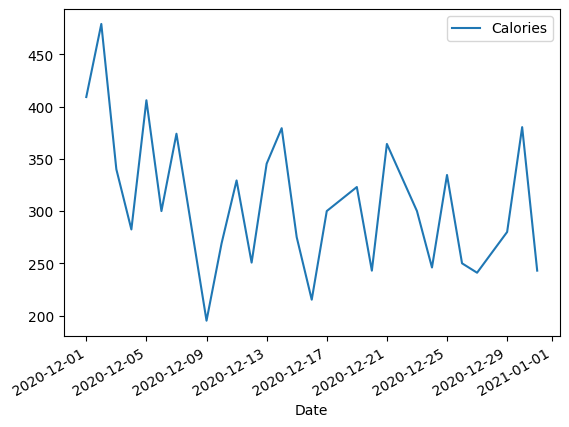

In [97]:
import matplotlib.pyplot as plt

workout_good.plot('Date', 'Calories') # plot calories burned every day

<Axes: xlabel='Pulse', ylabel='Calories'>

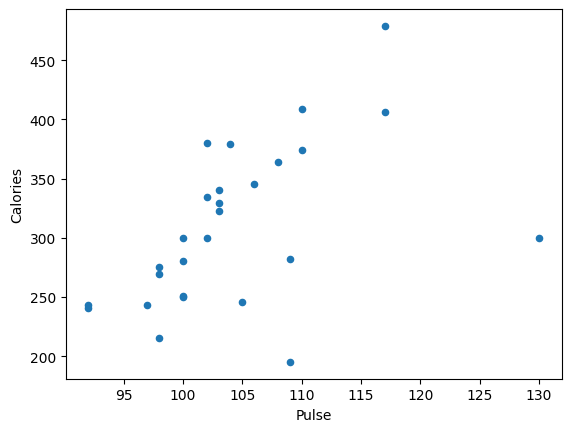

In [101]:
workout_good.plot.scatter(x='Pulse', y='Calories') # scatterplot of calories burned vs avg pulse

<Axes: ylabel='Frequency'>

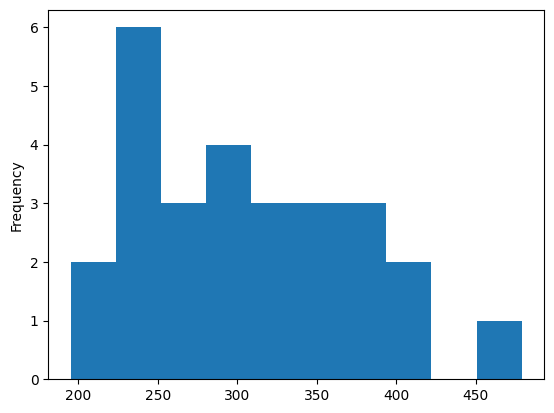

In [102]:
workout_good['Calories'].plot.hist() # plot a histogram of calories burned

If you're more comfortable with non-`pandas` syntax or want to use another method of analysis, you can pass `Series` objects as if they were any other iterable. For more general use, you can convert `Series` objects to `numpy` arrays using `to_numpy()`.

In [103]:
calories = workout_good['Calories'].to_numpy()
pulses = workout_good['Pulse'].to_numpy()

We can now use these however we've used `numpy` arrays thus far:

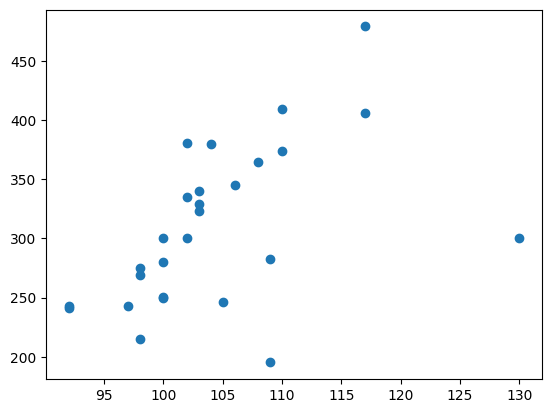

In [106]:
plt.scatter(pulses, calories) # plot a scatterplot

In [110]:
import numpy as np
calories.sum() # get the total number of calories burned 

8354.400000000001

In [111]:
np.dot(calories, pulses) # take a dot product...even if it doesn't make sense

878233.2

As always, this is just scratching the surface of what can be done with `pandas`; the official documentation can be found at https://pandas.pydata.org/docs/reference/index.html.